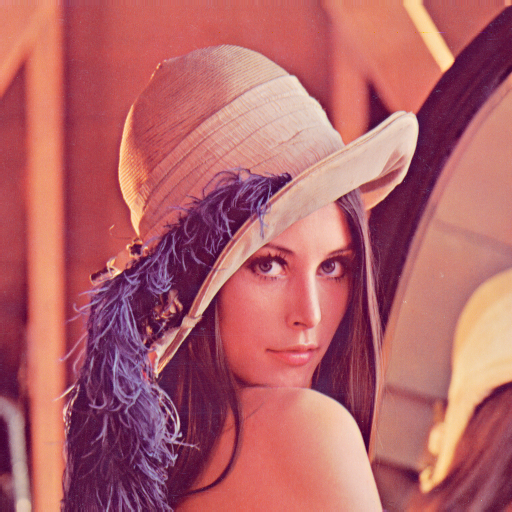

Image Size: 512 x 512 pixels
Total Pixels: 262144


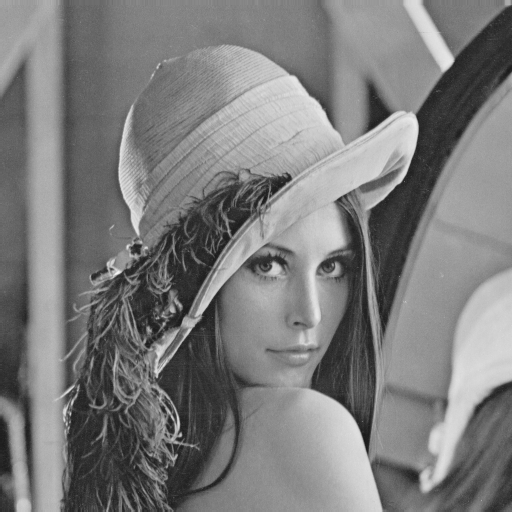

Black Pixel Count: 128178


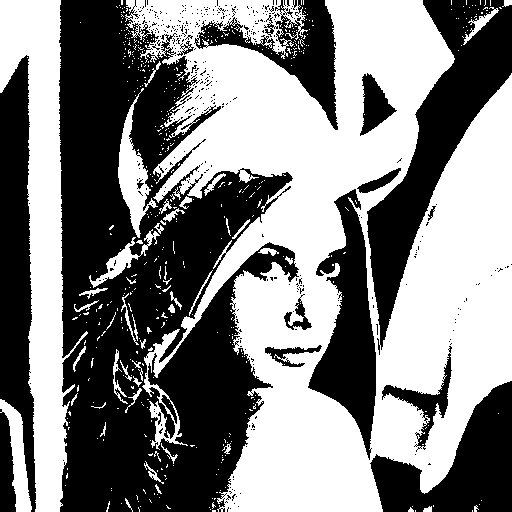

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # ✅ Use cv2_imshow for Colab

# Load the image
image_path = "/content/Lena_Image.png"  # Replace with your actual image path
image = cv2.imread(image_path)  # Read the image (BGR format)

# Display the image in Colab
cv2_imshow(image)  # ✅ FIX: Use cv2_imshow instead of cv2.imshow()

# Extract Image Size
height, width, channels = image.shape
print(f"Image Size: {width} x {height} pixels")
print(f"Total Pixels: {width * height}")

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)

# Display the grayscale image
cv2_imshow(gray_image)  # ✅ FIX: Use cv2_imshow()

# Convert to Binary using Thresholding
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)

# Count black pixels
black_pixels = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixels}")

# Display Binary Image
cv2_imshow(binary_image)  # ✅ FIX: Use cv2_imshow()

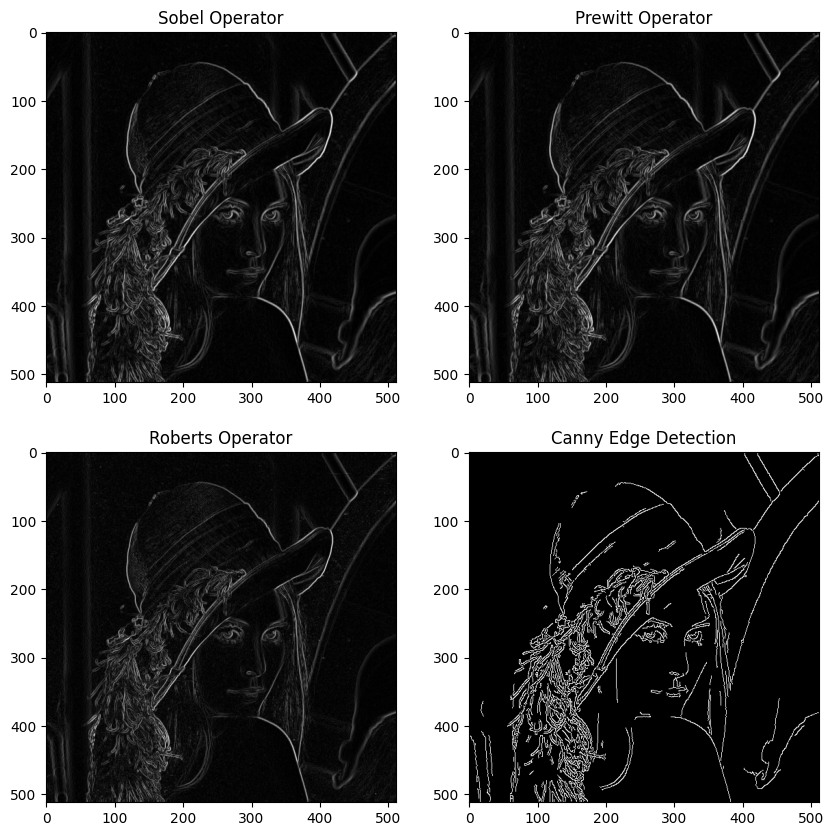

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.filters import prewitt_h, prewitt_v, roberts # Import filters directly
import matplotlib.pyplot as plt # Import for plotting

# ... (Rest of your code remains the same) ...

# 2. Prewitt Operator
prewitt_x = prewitt_h(gray_image)  # Call prewitt_h directly
prewitt_y = prewitt_v(gray_image)  # Call prewitt_v directly
prewitt_combined = np.hypot(prewitt_x, prewitt_y)

# 3. Roberts Operator
roberts = roberts(gray_image)  # Call roberts directly

# ... (Rest of your code remains the same) ...

# 4. Canny Edge Detection
canny_edges = cv2.Canny(gray_image, 100, 200)

# Display Edge Detection Results
plt.figure(figsize=(10,10 ))
plt.subplot(2, 2, 1)
plt.imshow(sobel_combined, cmap="gray")
plt.title("Sobel Operator")

plt.subplot(2, 2, 2)
plt.imshow(prewitt_combined, cmap="gray")
plt.title("Prewitt Operator")

plt.subplot(2, 2, 3)
plt.imshow(roberts, cmap="gray")
plt.title("Roberts Operator")

plt.subplot(2, 2, 4)
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")

plt.show()

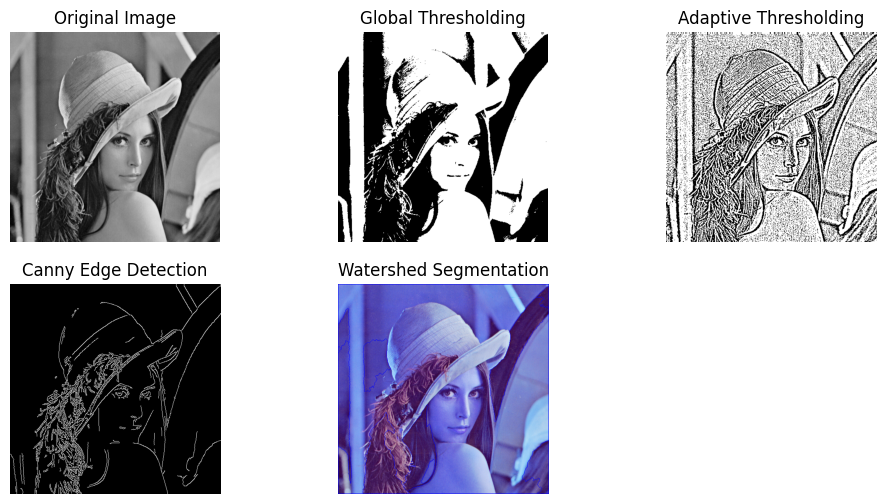

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread("/content/Lena_Image.png", cv2.IMREAD_GRAYSCALE)

# --- 1. Global Thresholding ---
_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# --- 2. Adaptive Thresholding ---
adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

# --- 3. Canny Edge Detection ---
edges = cv2.Canny(image, 100, 200)

# --- 4. Watershed Algorithm ---
# Convert to color image
image_color = cv2.imread("/content/Lena_Image.png")
gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]  # Mark boundaries in red

# --- Display the results ---
titles = ['Original Image', 'Global Thresholding', 'Adaptive Thresholding',
          'Canny Edge Detection', 'Watershed Segmentation']
images = [image, global_thresh, adaptive_thresh, edges, image_color]

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray' if i < 4 else None)
    plt.title(titles[i])
    plt.axis('off')

plt.show()